### WeatherPy: Background and Objectives

In this study the relationship between weather and latitude are explored through a randomly sampled weather data set from 500+ cities across the world. Utilizing the tool citipy, (https://pypi.python.org/pypi/citipy), and weather data from the Open Weather Map API, (https://openweathermap.org/api), a representative model of weather across world cities was created.

The objective of the study is to explore weather trends by generating a series of scatter plots that showcase the following relationships:
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude


### Conclusions


* In general, the maximum temperatures at a randomly selected group of cities in this study increases as latitudes approach the equator (0 Decimal Degrees Latitude, or 0 DD Lat). However, the results may be skewed in that availability of weather stations varies in Northern and Southern hemispheres. More of the Northern Hemisphere is populated near the polar region (> 60 degrees latitude), as opposed to in the Southern Hemisphere. As such, the range of latitudes with weather data in the Northern hemisphere are greater (~80 DD) than the Southern Hemisphere (~60 DD).


* The relationship between latitude and wind speed based on this dataset appears to be weak; however, one notices an increase in wind speeds at certain bands of latitudes. This could be due to circulation driven by pressure differentials between the Subtropical Zones (30, -30 DD Lat) and Polar Fronts (60, -60 DD Lat), where trade winds and polar easterlies prevail. Wind speeds appear to decrease towards the Equator. Colloquially the area along the equator is referred to as the Doldrums, characterized by a general calmness and light wind speeds. Analyzing the relationship between latitude and pressure could confirm these observations.


* The relationship between latitude and humidity inferred from this dataset are fairly inconclusive. Based on this dataset, there appear to be more weather stations experiencing higher humidity (> 60%) than lower humidity.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import random
import time
import json
import requests

# Import API key
from config import api_key

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lon_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lon and cities
lat_lon = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lons = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lons = zip(lats, lons) 

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [4]:
name=[]
clouds=[]
country=[] 
date=[]
humidity=[]
latitude=[]
longitude=[]
temp_max=[]
wind_speed=[]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [5]:
print("-----------------------")
print("Begin Data Retrieval")
print("-----------------------")

for x in range(len(cities)):
    try:
        print(f"Making request number: {x} for city: {cities[x]}")
        weather_response = requests.get(query_url + str(cities[x])).json()
        name.append(weather_response['name'])  
        country.append(weather_response['sys']['country'])
        latitude.append(weather_response['coord']['lat'])
        longitude.append(weather_response['coord']['lon'])
        date.append(weather_response ['dt'])
        temp_max.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        wind_speed.append(weather_response['wind']['speed'])
        clouds.append(weather_response['clouds']['all'])
        
    except (KeyError, TypeError):
        print("Missing field/result... skipping.")
           
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")


-----------------------
Begin Data Retrieval
-----------------------
Making request number: 0 for city: busselton
Making request number: 1 for city: deputatskiy
Making request number: 2 for city: dunedin
Making request number: 3 for city: vaini
Making request number: 4 for city: ushuaia
Making request number: 5 for city: kawalu
Making request number: 6 for city: bredasdorp
Making request number: 7 for city: ituacu
Making request number: 8 for city: butaritari
Making request number: 9 for city: bafia
Making request number: 10 for city: hilo
Making request number: 11 for city: barrow
Making request number: 12 for city: taolanaro
Missing field/result... skipping.
Making request number: 13 for city: amderma
Missing field/result... skipping.
Making request number: 14 for city: brasilia de minas
Making request number: 15 for city: mogadishu
Making request number: 16 for city: saint george
Making request number: 17 for city: jamestown
Making request number: 18 for city: rikitea
Making request

Making request number: 165 for city: jelgava
Making request number: 166 for city: sorada
Making request number: 167 for city: cheyenne
Making request number: 168 for city: nyurba
Making request number: 169 for city: ribera
Making request number: 170 for city: airai
Making request number: 171 for city: konin
Making request number: 172 for city: robertsport
Making request number: 173 for city: guilin
Making request number: 174 for city: merauke
Making request number: 175 for city: torbay
Making request number: 176 for city: andilamena
Making request number: 177 for city: amahai
Making request number: 178 for city: palabuhanratu
Missing field/result... skipping.
Making request number: 179 for city: horana
Making request number: 180 for city: arraial do cabo
Making request number: 181 for city: cidreira
Making request number: 182 for city: taloqan
Making request number: 183 for city: pangnirtung
Making request number: 184 for city: umm lajj
Making request number: 185 for city: stokmarknes


Making request number: 327 for city: narsaq
Making request number: 328 for city: labrea
Missing field/result... skipping.
Making request number: 329 for city: karamea
Missing field/result... skipping.
Making request number: 330 for city: moron
Making request number: 331 for city: wellington
Making request number: 332 for city: kamenskoye
Missing field/result... skipping.
Making request number: 333 for city: bac lieu
Missing field/result... skipping.
Making request number: 334 for city: maniitsoq
Making request number: 335 for city: rafai
Making request number: 336 for city: santa cruz del sur
Making request number: 337 for city: teya
Making request number: 338 for city: buala
Making request number: 339 for city: bokaa
Making request number: 340 for city: saldanha
Making request number: 341 for city: diego de almagro
Making request number: 342 for city: lolua
Missing field/result... skipping.
Making request number: 343 for city: ust-nera
Making request number: 344 for city: katsuura
Mak

Making request number: 491 for city: zhoucheng
Making request number: 492 for city: craigieburn
Making request number: 493 for city: mana
Making request number: 494 for city: acapulco
Making request number: 495 for city: jieshi
Making request number: 496 for city: coahuayana
Making request number: 497 for city: ihosy
Making request number: 498 for city: mineral wells
Making request number: 499 for city: seevetal
Making request number: 500 for city: fairbanks
Making request number: 501 for city: san carlos de bariloche
Making request number: 502 for city: necochea
Making request number: 503 for city: bathsheba
Making request number: 504 for city: babanusah
Missing field/result... skipping.
Making request number: 505 for city: solnechnyy
Making request number: 506 for city: naumburg
Making request number: 507 for city: sidi ali
Making request number: 508 for city: paamiut
Making request number: 509 for city: rawson
Making request number: 510 for city: kaoma
Making request number: 511 for

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Check number of results
len(date)


552

In [7]:
weather_dict = {"City": name, "Country": country, "Lat": latitude, "Lon": longitude, "Date": date, "Max Temp": temp_max, "Humidity": humidity,
                "Cloudiness": clouds, "Wind Speed mph": wind_speed}
weather_data = pd.DataFrame(weather_dict)                
weather_data.head()         

,City,Country,Lat,Lon,Date,Max Temp,Humidity,Cloudiness,Wind Speed mph
0,Busselton,AU,-33.64,115.35,1552834694,72.00,49,8,17.49
1,Deputatskiy,RU,69.30,139.90,1552834730,-23.66,33,48,2.73
2,Dunedin,NZ,-45.87,170.50,1552834417,55.99,96,8,3.29
3,Vaini,IN,15.34,74.49,1552834731,80.38,46,8,4.63
4,Ushuaia,AR,-54.81,-68.31,1552831200,46.40,100,90,4.63


In [8]:
#save to file
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

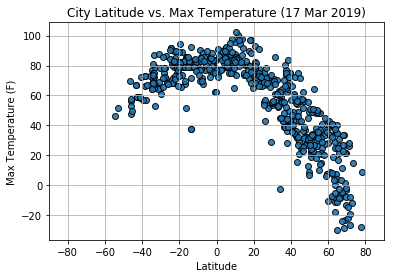

In [9]:
lat_temp_plt = plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolor='black', alpha=0.9)
plt.title('City Latitude vs. Max Temperature (17 Mar 2019)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlim(-90,90)
plt.grid()

# Save the Figure
plt.savefig("lat_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

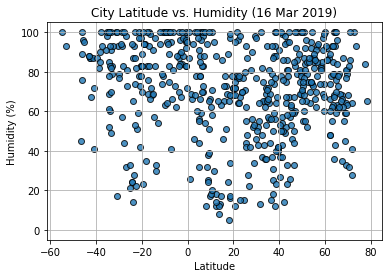

In [11]:
lat_hum_plt = plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolor='black', alpha=0.8)
plt.title('City Latitude vs. Humidity (16 Mar 2019)')
plt.xlabel('Latitude')
plt.ylim(-5,105)
plt.ylabel('Humidity (%)')
plt.grid()

# Save the Figure
plt.savefig("lat_hum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

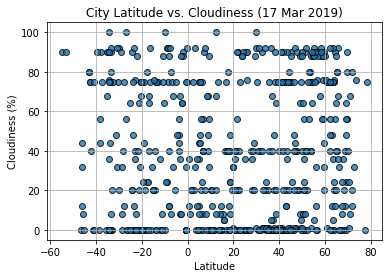

In [13]:
lat_cloud_plt = plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolor='black', alpha=0.8)
plt.title('City Latitude vs. Cloudiness (17 Mar 2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the Figure
plt.savefig("lat_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

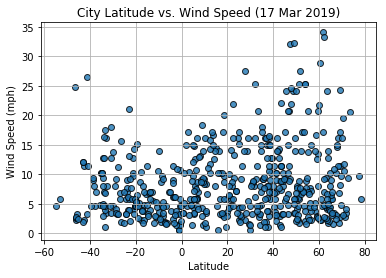

In [15]:
lat_wind_plt = plt.scatter(weather_data["Lat"], weather_data["Wind Speed mph"], marker="o", edgecolor='black', alpha=0.8)
plt.title('City Latitude vs. Wind Speed (17 Mar 2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

# Save the Figure
plt.savefig("lat_wind.png")
plt.show()

##### Additional plots that aid in visualizing the data geographically

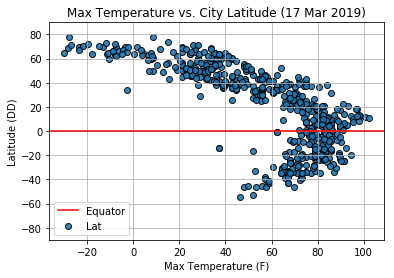

In [10]:
temp_lat_plt = plt.scatter(weather_data["Max Temp"], weather_data["Lat"], marker="o", edgecolor='black', alpha=0.9)
plt.title('Max Temperature vs. City Latitude (17 Mar 2019)')
plt.ylabel('Latitude (DD)')
plt.xlabel('Max Temperature (F)')
plt.ylim(-90,90)
plt.axhline(y=0, color='r', linestyle='-', label="Equator")
plt.legend(loc="lower left")
plt.grid()

# Save the Figure
plt.savefig("temp_lat.png")
plt.show()

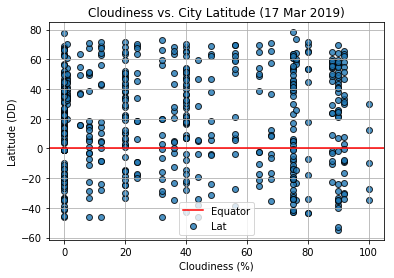

In [14]:
cloud_lat_plt = plt.scatter(weather_data["Cloudiness"], weather_data["Lat"], marker="o", edgecolor='black', alpha=0.8)
plt.title('Cloudiness vs. City Latitude (17 Mar 2019)')
plt.ylabel('Latitude (DD)')
plt.xlabel('Cloudiness (%)')
plt.axhline(y=0, color='r', linestyle='-', label="Equator")
plt.legend(loc="best")
plt.grid()

# Save the Figure
plt.savefig("cloud_lat.png")
plt.show()

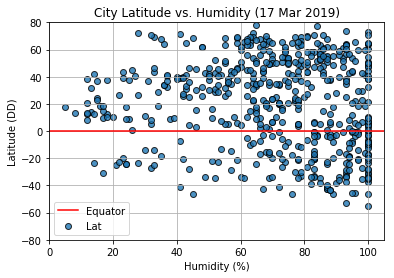

In [12]:
hum_lat_plt = plt.scatter(weather_data["Humidity"], weather_data["Lat"], marker="o", edgecolor='black', alpha=0.8)
plt.title('City Latitude vs. Humidity (17 Mar 2019)')
plt.ylabel('Latitude (DD)')
plt.xlabel('Humidity (%)')
plt.xlim(0,105)
plt.ylim(-80, 80)
plt.axhline(y=0, color='r', linestyle='-', label="Equator")
plt.legend(loc="lower left")
plt.grid()

# Save the Figure
plt.savefig("hum_lat.png")
plt.show()

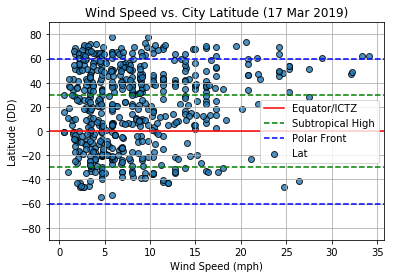

In [16]:
wind_lat_plt = plt.scatter(weather_data["Wind Speed mph"], weather_data["Lat"], marker="o", edgecolor='black', alpha=0.8)
plt.title('Wind Speed vs. City Latitude (17 Mar 2019)')
plt.ylabel('Latitude (DD)')
plt.xlabel('Wind Speed (mph)')
plt.ylim(-90,90)
plt.axhline(y=0, color='r', linestyle='-', label="Equator/ICTZ")
plt.axhline(y=30, color='g', linestyle="--",label="Subtropical High")
plt.axhline(y=-30, color='g', linestyle="--")
plt.axhline(y=60, color='b',linestyle="--",label="Polar Front" )
plt.axhline(y=-60, color='b',linestyle="--")
plt.legend(loc="best")
plt.grid()

# Save the Figure
plt.savefig("wind_lat.png")
plt.show()